In [16]:
import zipfile

# 指定zip文件路径
zip_path = '../Data/2022/2022_no_nans.zip'

# 初始化CSV文件名列表
csv_file_names = []

# 使用with语句打开zip文件
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # 列出zip文件中的所有文件
    file_names = zip_ref.namelist()
    
    # 筛选出CSV文件名
    csv_file_names = [file_name for file_name in file_names if file_name.endswith('.csv')]

# 打印CSV文件名
for csv_file_name in csv_file_names:
    print(csv_file_name)

heart_2022_no_nans.csv


C:\Users\hunte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Detected outliers in PhysicalHealthDays:
14        25.0
19        30.0
20        30.0
24        30.0
30        15.0
          ... 
245968    30.0
245973    30.0
245978    14.0
245987    30.0
245993    20.0
Name: PhysicalHealthDays, Length: 38810, dtype: float64



C:\Users\hunte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Detected outliers in MentalHealthDays:
4         15.0
14        25.0
15        15.0
23        30.0
37        27.0
          ... 
245978    14.0
245993    17.0
246000    30.0
246012    30.0
246019    15.0
Name: MentalHealthDays, Length: 32714, dtype: float64



C:\Users\hunte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Detected outliers in SleepHours:
77        12.0
96        12.0
114       12.0
133       18.0
260       12.0
          ... 
245849    12.0
245914     1.0
245932    12.0
245936    18.0
246014    12.0
Name: SleepHours, Length: 3488, dtype: float64



C:\Users\hunte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Detected outliers in HeightInMeters:
246       1.22
267       1.22
541       2.01
616       1.22
1236      1.35
          ... 
245488    1.35
245548    2.03
245626    1.35
245801    2.13
245933    1.35
Name: HeightInMeters, Length: 830, dtype: float64



C:\Users\hunte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Detected outliers in WeightInKilograms:
111       163.29
224       145.15
239       181.44
246       136.08
419       136.08
           ...  
245456    149.69
245534    156.49
245618    136.08
245789    136.08
245998    142.88
Name: WeightInKilograms, Length: 5940, dtype: float64



C:\Users\hunte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Detected outliers in BMI:
11        46.87
64        43.90
77        44.29
111       58.10
136       49.95
          ...  
245953    45.49
245970    43.58
245972    43.85
245998    47.90
245999    43.90
Name: BMI, Length: 7563, dtype: float64



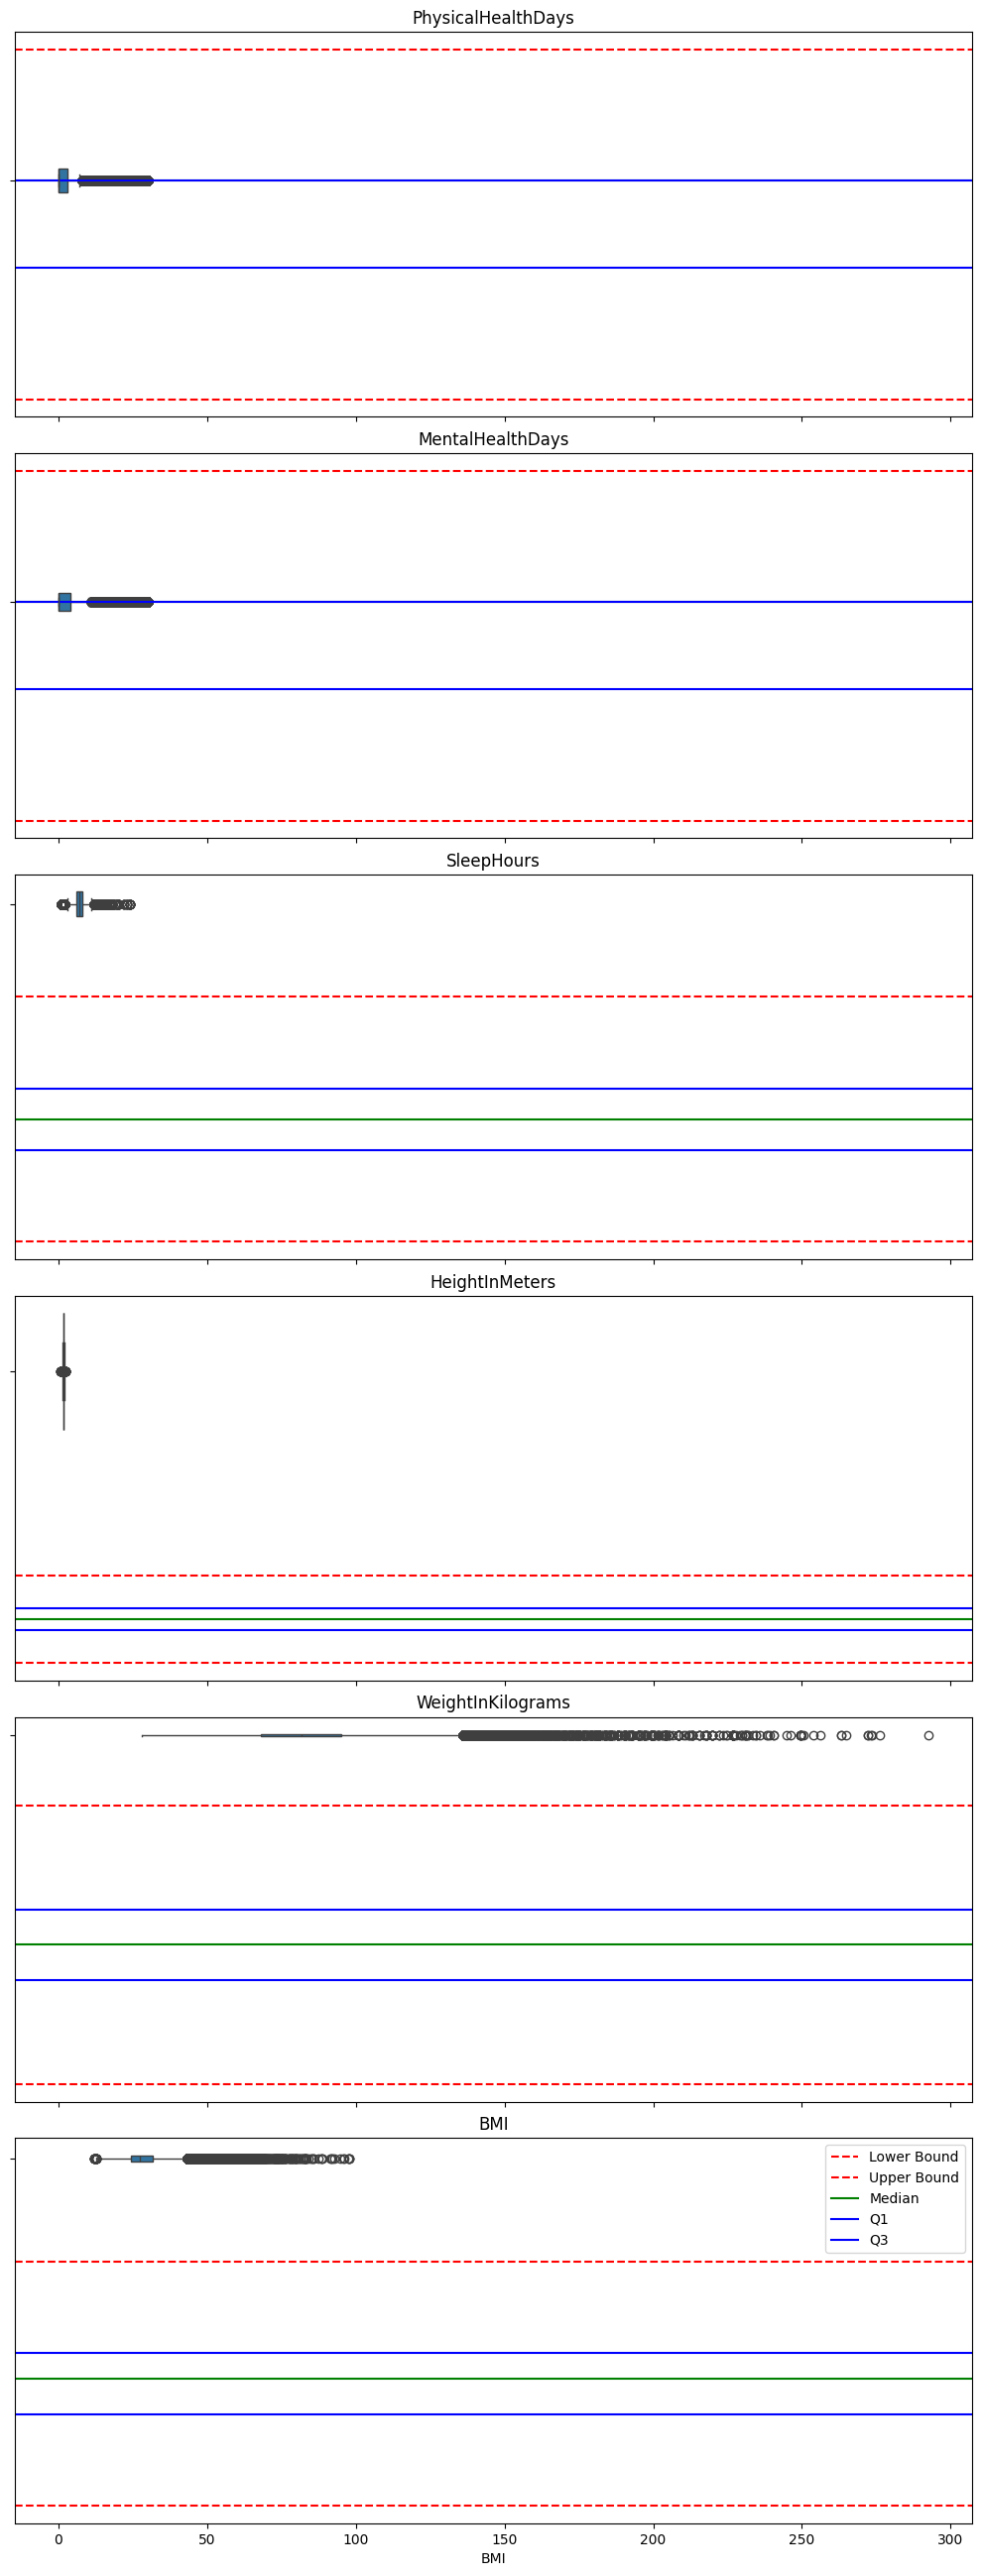

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
# 指定zip文件路径
zip_path = '../Data/2022/2022_no_nans.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # 列出zip文件中的所有文件
    file_names = zip_ref.namelist()
    
    # 筛选出CSV文件名
    csv_file_names = [file_name for file_name in file_names if file_name.endswith('.csv')]

    # 遍历所有CSV文件名
    for csv_file_name in csv_file_names:
        # 读取CSV文件
        df = pd.read_csv(zip_ref.open(csv_file_name))

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 创建一个图形，每个数值型列一个子图
n = len(numerical_columns)
fig, axes = plt.subplots(nrows=n, figsize=(10, 5 * n), sharex=True)

# 对每个数值型列绘制箱线图并计算IQR
for i, column in enumerate(numerical_columns):
    data = df[column]
    Q1 = data.quantile(0.25)
    median = data.median()  # 定义中位数
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # 绘制箱线图
    sns.boxplot(x=data, ax=axes[i], orient='v')

    # 打印异常值
    print(f"Detected outliers in {column}:")
    print(outliers)
    print()

    # 标记异常值界限
    axes[i].axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
    axes[i].axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')

    # 标记中位数
    axes[i].axhline(y=median, color='g', linestyle='-', label='Median')

    # 标记四分位数
    axes[i].axhline(y=Q1, color='b', linestyle='-', label='Q1')
    axes[i].axhline(y=Q3, color='b', linestyle='-', label='Q3')

    # 标记轴标题
    axes[i].set_title(column)

# 调整子图间距
plt.tight_layout()

# 显示图例
plt.subplots_adjust(bottom=0.15)  # 调整图例位置
handles, labels = axes[0].get_legend_handles_labels()
plt.legend(handles, labels, loc='upper right')

# 显示图形
plt.show()

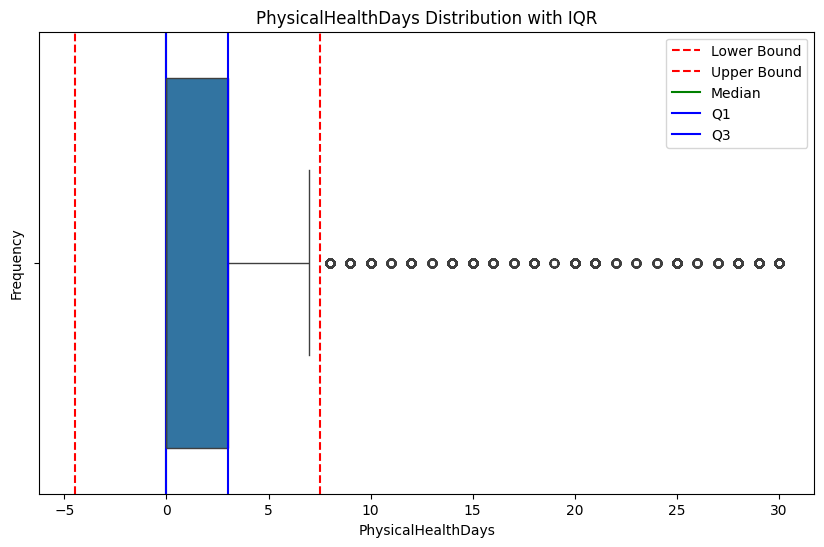

Detected outliers in PhysicalHealthDayss:
14        25.0
19        30.0
20        30.0
24        30.0
30        15.0
          ... 
245968    30.0
245973    30.0
245978    14.0
245987    30.0
245993    20.0
Name: PhysicalHealthDays, Length: 38810, dtype: float64


In [30]:
import seaborn as sns



# 选择 'PhysicalHealthDayss' 列
PhysicalHealthDays = df['PhysicalHealthDays']

# 计算四分位数和IQR
Q1 = PhysicalHealthDays.quantile(0.25)
Q3 = PhysicalHealthDays.quantile(0.75)
IQR = Q3 - Q1

# 计算异常值的界限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 识别异常值
outliers = PhysicalHealthDays[(PhysicalHealthDays < lower_bound) | (PhysicalHealthDays > upper_bound)]

# 可视化 'PhysicalHealthDayss' 的分布和异常值
plt.figure(figsize=(10, 6))
sns.boxplot(x=PhysicalHealthDays, orient='h')

# 在箱线图上标记异常值界限
plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')

# 标记中位数
median = PhysicalHealthDays.median()
plt.axvline(x=median, color='g', linestyle='-', label='Median')

# 标记四分位数
plt.axvline(x=Q1, color='b', linestyle='-', label='Q1')
plt.axvline(x=Q3, color='b', linestyle='-', label='Q3')

# 显示图例
plt.legend()

# 标记轴标题
plt.title('PhysicalHealthDays Distribution with IQR')
plt.xlabel('PhysicalHealthDays')
plt.ylabel('Frequency')

# 显示图形
plt.show()

# 打印异常值
print(f"Detected outliers in PhysicalHealthDayss:\n{outliers}")

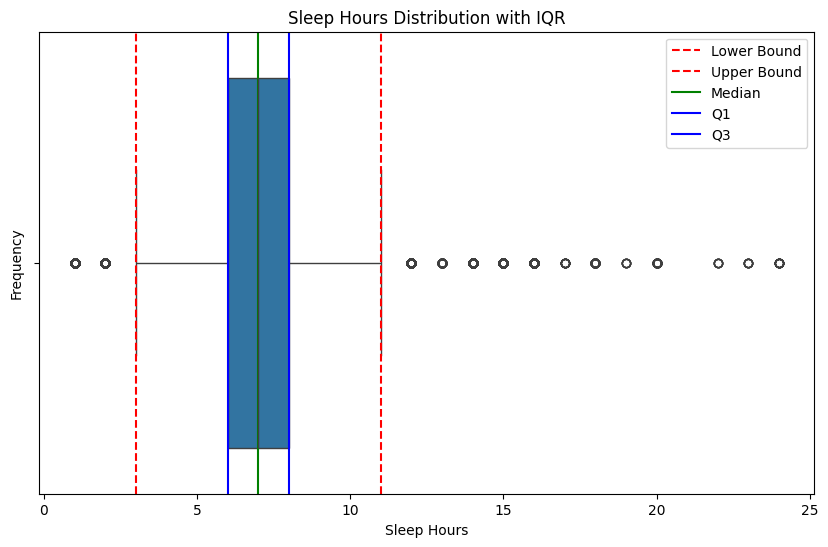

Detected outliers in SleepHours:
77        12.0
96        12.0
114       12.0
133       18.0
260       12.0
          ... 
245849    12.0
245914     1.0
245932    12.0
245936    18.0
246014    12.0
Name: SleepHours, Length: 3488, dtype: float64


In [27]:
import seaborn as sns



# 选择 'SleepHours' 列
sleep_hours = df['SleepHours']

# 计算四分位数和IQR
Q1 = sleep_hours.quantile(0.25)
Q3 = sleep_hours.quantile(0.75)
IQR = Q3 - Q1

# 计算异常值的界限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 识别异常值
outliers = sleep_hours[(sleep_hours < lower_bound) | (sleep_hours > upper_bound)]

# 可视化 'SleepHours' 的分布和异常值
plt.figure(figsize=(10, 6))
sns.boxplot(x=sleep_hours, orient='h')

# 在箱线图上标记异常值界限
plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')

# 标记中位数
median = sleep_hours.median()
plt.axvline(x=median, color='g', linestyle='-', label='Median')

# 标记四分位数
plt.axvline(x=Q1, color='b', linestyle='-', label='Q1')
plt.axvline(x=Q3, color='b', linestyle='-', label='Q3')

# 显示图例
plt.legend()

# 标记轴标题
plt.title('Sleep Hours Distribution with IQR')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')

# 显示图形
plt.show()

# 打印异常值
print(f"Detected outliers in SleepHours:\n{outliers}")

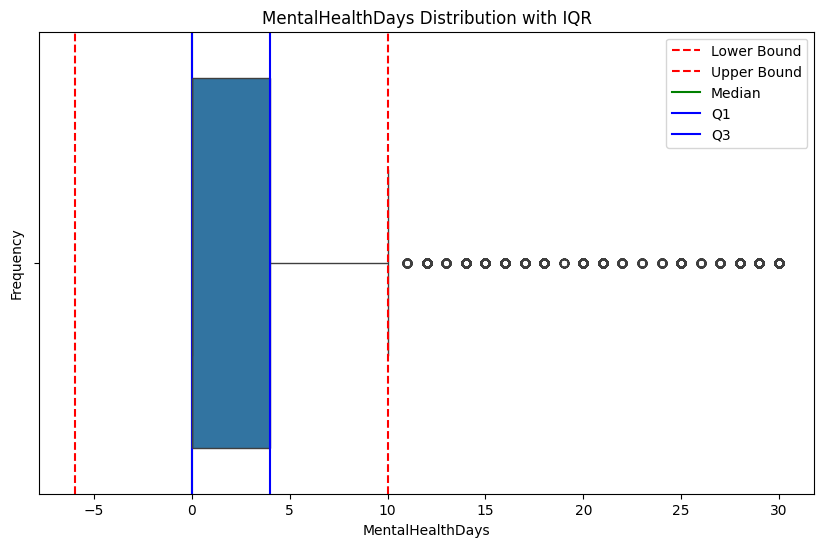

Detected outliers in MentalHealthDays:
4         15.0
14        25.0
15        15.0
23        30.0
37        27.0
          ... 
245978    14.0
245993    17.0
246000    30.0
246012    30.0
246019    15.0
Name: MentalHealthDays, Length: 32714, dtype: float64


In [31]:
import seaborn as sns



# 选择 'MentalHealthDays' 列
MentalHealthDays = df['MentalHealthDays']

# 计算四分位数和IQR
Q1 = MentalHealthDays.quantile(0.25)
Q3 = MentalHealthDays.quantile(0.75)
IQR = Q3 - Q1

# 计算异常值的界限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 识别异常值
outliers = MentalHealthDays[(MentalHealthDays < lower_bound) | (MentalHealthDays > upper_bound)]

# 可视化 'MentalHealthDays' 的分布和异常值
plt.figure(figsize=(10, 6))
sns.boxplot(x=MentalHealthDays, orient='h')

# 在箱线图上标记异常值界限
plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')

# 标记中位数
median = MentalHealthDays.median()
plt.axvline(x=median, color='g', linestyle='-', label='Median')

# 标记四分位数
plt.axvline(x=Q1, color='b', linestyle='-', label='Q1')
plt.axvline(x=Q3, color='b', linestyle='-', label='Q3')

# 显示图例
plt.legend()

# 标记轴标题
plt.title('MentalHealthDays Distribution with IQR')
plt.xlabel('MentalHealthDays')
plt.ylabel('Frequency')

# 显示图形
plt.show()

# 打印异常值
print(f"Detected outliers in MentalHealthDays:\n{outliers}")

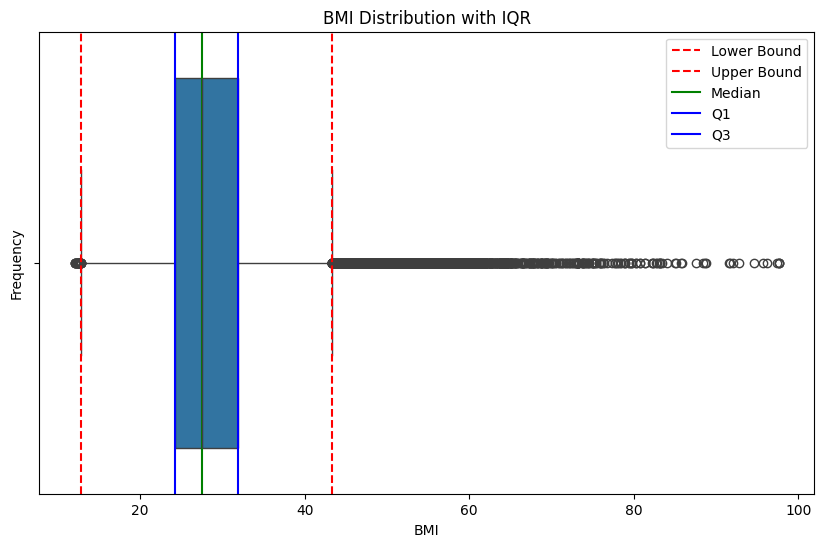

Detected outliers in BMI:
11        46.87
64        43.90
77        44.29
111       58.10
136       49.95
          ...  
245953    45.49
245970    43.58
245972    43.85
245998    47.90
245999    43.90
Name: BMI, Length: 7563, dtype: float64


In [32]:
import seaborn as sns



# 选择 'MentalHealthDays' 列
BMI = df['BMI']

# 计算四分位数和IQR
Q1 = BMI.quantile(0.25)
Q3 = BMI.quantile(0.75)
IQR = Q3 - Q1

# 计算异常值的界限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 识别异常值
outliers = BMI[(BMI < lower_bound) | (BMI > upper_bound)]

# 可视化 'BMI' 的分布和异常值
plt.figure(figsize=(10, 6))
sns.boxplot(x=BMI, orient='h')

# 在箱线图上标记异常值界限
plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')

# 标记中位数
median = BMI.median()
plt.axvline(x=median, color='g', linestyle='-', label='Median')

# 标记四分位数
plt.axvline(x=Q1, color='b', linestyle='-', label='Q1')
plt.axvline(x=Q3, color='b', linestyle='-', label='Q3')

# 显示图例
plt.legend()

# 标记轴标题
plt.title('BMI Distribution with IQR')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# 显示图形
plt.show()

# 打印异常值
print(f"Detected outliers in BMI:\n{outliers}")

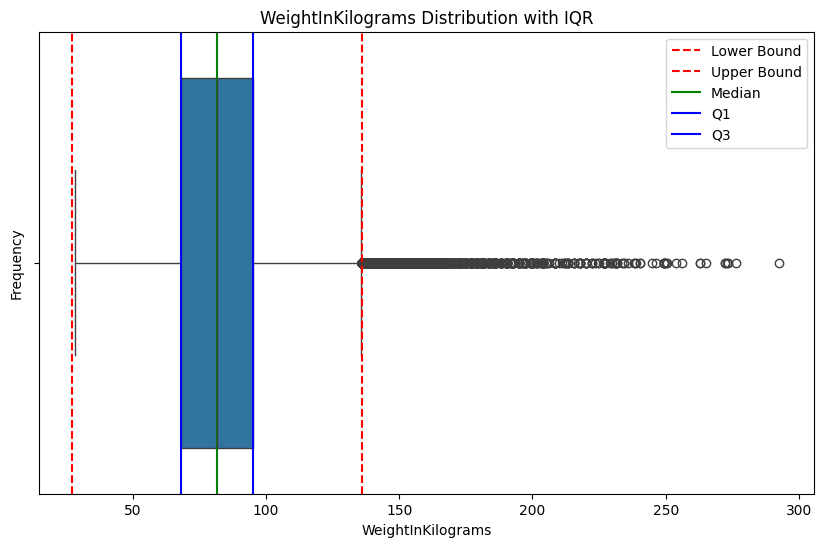

Detected outliers in WeightInKilograms:
111       163.29
224       145.15
239       181.44
246       136.08
419       136.08
           ...  
245456    149.69
245534    156.49
245618    136.08
245789    136.08
245998    142.88
Name: WeightInKilograms, Length: 5940, dtype: float64


In [34]:
import seaborn as sns



# 选择 'MentalHealthDays' 列
WeightInKilograms = df['WeightInKilograms']

# 计算四分位数和IQR
Q1 = WeightInKilograms.quantile(0.25)
Q3 = WeightInKilograms.quantile(0.75)
IQR = Q3 - Q1

# 计算异常值的界限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 识别异常值
outliers = WeightInKilograms[(WeightInKilograms < lower_bound) | (WeightInKilograms > upper_bound)]

# 可视化 'WeightInKilograms' 的分布和异常值
plt.figure(figsize=(10, 6))
sns.boxplot(x=WeightInKilograms, orient='h')

# 在箱线图上标记异常值界限
plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')

# 标记中位数
median = WeightInKilograms.median()
plt.axvline(x=median, color='g', linestyle='-', label='Median')

# 标记四分位数
plt.axvline(x=Q1, color='b', linestyle='-', label='Q1')
plt.axvline(x=Q3, color='b', linestyle='-', label='Q3')

# 显示图例
plt.legend()

# 标记轴标题
plt.title('WeightInKilograms Distribution with IQR')
plt.xlabel('WeightInKilograms')
plt.ylabel('Frequency')

# 显示图形
plt.show()

# 打印异常值
print(f"Detected outliers in WeightInKilograms:\n{outliers}")

In [ ]:
import seaborn as sns



# 选择 'MentalHealthDays' 列
WeightInKilograms = df['HeightInMeters']

# 计算四分位数和IQR
Q1 = HeightInMeters.quantile(0.25)
Q3 = HeightInMeters.quantile(0.75)
IQR = Q3 - Q1

# 计算异常值的界限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 识别异常值
outliers = HeightInMeters[(HeightInMeters < lower_bound) | (HeightInMeters > upper_bound)]

# 可视化 'HeightInMeters' 的分布和异常值
plt.figure(figsize=(10, 6))
sns.boxplot(x=HeightInMeters, orient='h')

# 在箱线图上标记异常值界限
plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')

# 标记中位数
median = HeightInMeters.median()
plt.axvline(x=median, color='g', linestyle='-', label='Median')

# 标记四分位数
plt.axvline(x=Q1, color='b', linestyle='-', label='Q1')
plt.axvline(x=Q3, color='b', linestyle='-', label='Q3')

# 显示图例
plt.legend()

# 标记轴标题
plt.title('HeightInMeters Distribution with IQR')
plt.xlabel('HeightInMeters')
plt.ylabel('Frequency')

# 显示图形
plt.show()

# 打印异常值
print(f"Detected outliers in HeightInMeters:\n{outliers}")